In [36]:
import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [37]:
fnames = ["CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_01_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_03_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_05_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_07_mom_2023-01-13.json",
          "CloudModel_training_results_15epochs_24batchsize_0.001lr_BCELoss()_crit_SGD_optim_09_mom_2023-01-13.json",
          "CloudModel_training_results_25epochs_24batchsize_0.01lr_BCELoss()_crit_Adam_optim_2023-01-13.json",
          "CloudModel_training_results_20epochs_24batchsize_0.005lr_BCELoss()_crit_SGD_optim_09_mom_2023-01-14.json",
          "CloudModel_training_results_15epochs_24batchsize_0.1lr_BCELoss()_crit_SGD_optim_09_mom_2023-01-13.json",
          "CloudModel_training_results_10epochs_24batchsize_0.01lr_BCELoss()_crit_SGD_optim_09mom_2023-01-14.json",
         ]
p01 = pd.read_json(fnames[0],orient='column')
p03 = pd.read_json(fnames[1],orient='column')
#p05 = pd.read_json(fnames[2],orient='column')
#p07 = pd.read_json(fnames[3],orient='column')
p09 = pd.read_json(fnames[4],orient='column')
#pad = pd.read_json(fnames[5],orient='column')
p090005 = pd.read_json(fnames[6], orient='column')
p0901 = pd.read_json(fnames[7], orient='column')
p09001 = pd.read_json(fnames[8], orient='column')

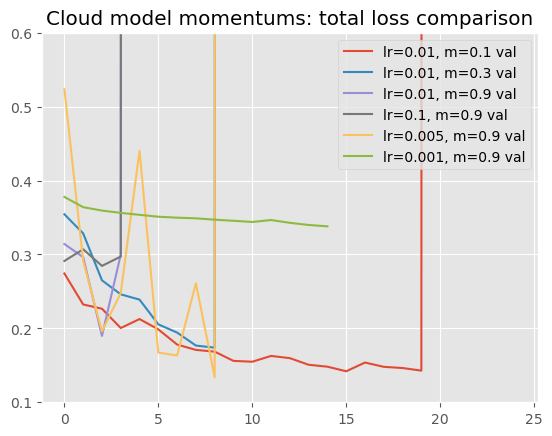

In [44]:
plt.figure()
#plt.plot(p01['training']['total_loss'], label= 'lr=0.01, m=0.1 training')
plt.plot(p01['validating']['total_loss'], label= 'lr=0.01, m=0.1 val')
#plt.plot(p03['training']['total_loss'], label = 'm=0.3 training')
plt.plot(p03['validating']['total_loss'], label= 'lr=0.01, m=0.3 val')

#plt.plot(p05['training']['total_loss'], label = 'm=0.5')
#plt.plot(p07['training']['total_loss'], label = 'm=0.7')

#plt.plot(p09001['training']['total_loss'], label = 'lr=0.01, m=0.9 train')
plt.plot(p09001['validating']['total_loss'], label = 'lr=0.01, m=0.9 val')



#plt.plot(p0901['training']['total_loss'], label = 'lr 0.1, m=0.9 train')
plt.plot(p0901['validating']['total_loss'], label = 'lr=0.1, m=0.9 val')

#plt.plot(p0905['training']['total_loss'], label = 'lr 0.005, m=0.9 train')
plt.plot(p090005['validating']['total_loss'], label = 'lr=0.005, m=0.9 val')


#plt.plot(p09['training']['total_loss'], label = 'lr=0.001, m=0.9 train')
plt.plot(p09['validating']['total_loss'], label = 'lr=0.001, m=0.9 val')

#plt.plot(pad['training']['total_loss'], label = 'adam')
plt.title('Cloud model momentums: total loss comparison')
plt.ylim([0.1,0.6])
plt.legend()
plt.show()

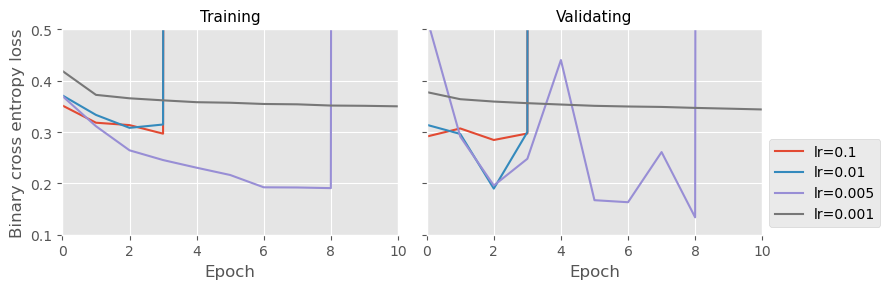

In [72]:
fig, [ax1, ax2] = plt.subplots(1,2,sharey=True, figsize=(8,3))

ax1.plot(p0901['training']['total_loss'], label = 'lr 0.1')
ax2.plot(p0901['validating']['total_loss'], label = 'lr=0.1')

ax1.plot(p09001['training']['total_loss'], label = 'lr=0.01')
ax2.plot(p09001['validating']['total_loss'], label = 'lr=0.01')

ax1.plot(p090005['training']['total_loss'], label = 'lr 0.005')
ax2.plot(p090005['validating']['total_loss'], label = 'lr=0.005')

ax1.plot(p09['training']['total_loss'], label = 'lr=0.001')
ax2.plot(p09['validating']['total_loss'], label = 'lr=0.001')


ax1.set_title("Training", fontsize=11)
ax2.set_title("Validating", fontsize=11)
ax1.set_xlabel("Epoch")
ax2.set_xlabel("Epoch")
ax1.set_ylabel("Binary cross entropy loss")
#plt.suptitle('Effect of learning rate', fontsize=15)
ax1.set_ylim([0.1,0.5])
ax1.set_xlim([0,10])
ax2.set_xlim([0,10])
fig.tight_layout()
ax2.legend(bbox_to_anchor=(1, 0.5))
plt.show()

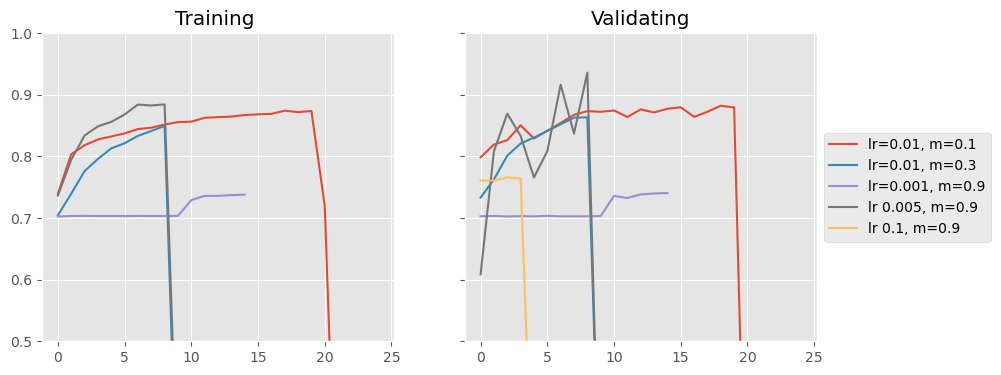

In [35]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=[10,4])

axs[0].plot(p01['training']['accuracy'], label= 'lr=0.01, m=0.1')
axs[1].plot(p01['validating']['accuracy'], label= 'lr=0.01, m=0.1')
axs[0].plot(p03['training']['accuracy'], label = 'lr=0.01, m=0.3')
axs[1].plot(p03['validating']['accuracy'], label= 'lr=0.01, m=0.3')
#axs[0].plot(p05['training']['accuracy'], label = 'm=0.5')
#axs[1].plot(p07['training']['accuracy'], label = 'm=0.7')

axs[0].plot(p09['training']['accuracy'], label = 'lr=0.001, m=0.9')
axs[1].plot(p09['validating']['accuracy'], label = 'lr=0.001, m=0.9')

#axs[0].plot(pad['training']['accuracy'], label = 'adam')

axs[0].plot(p0905['training']['micro/f1'], label = 'lr 0.005, m=0.9')
axs[1].plot(p0905['validating']['micro/f1'], label = 'lr 0.005, m=0.9')

#plt.plot(p0901['training']['accuracy'], label = 'lr 0.1, m=0.9')
plt.plot(p0901['validating']['accuracy'], label = 'lr 0.1, m=0.9')

axs[0].set_title("Training ")
plt.ylim([0.5,1])
axs[1].set_title('Validating')
axs[1].legend(bbox_to_anchor=(1, 0.7))
#handles, labels = axs[1].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.9))
plt.show()